In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t

### A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale Customer.csv) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel/Restaurant/Café HoReCa, Retail).

In [2]:
df1 = pd.read_csv('Wholesale+Customers+Data.csv')

## Using methods of descriptive statistics to summarize data. Checking which Region and which Channel seems to spend more. Checking which Region and which Channel seems to spend less.

In [3]:
## Describing the data

In [4]:
df1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
## Checking for missing values
df1.isnull().sum().sum()

0

In [7]:
df1.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [8]:
df1['total'] = df1['Fresh'] + df1['Milk'] + df1['Grocery'] + df1['Frozen'] + df1['Detergents_Paper'] + df1['Delicatessen']
df1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [9]:
## To find which Region and which Channel seems to spend more
## To find which Region and which Channel seems to spend less

In [10]:

df1_groupby_region = df1.groupby('Region')
df1_groupby_channel = df1.groupby('Channel')


In [11]:
df1_groupby_region['total'].sum().nlargest()

Region
Other     10677599
Lisbon     2386813
Oporto     1555088
Name: total, dtype: int64

In [12]:
df1_groupby_channel['total'].sum().nlargest()

Channel
Hotel     7999569
Retail    6619931
Name: total, dtype: int64

In [13]:
df1_groupby_region['total'].sum().nsmallest()

Region
Oporto     1555088
Lisbon     2386813
Other     10677599
Name: total, dtype: int64

In [14]:
df1_groupby_channel['total'].sum().nsmallest()

Channel
Retail    6619931
Hotel     7999569
Name: total, dtype: int64


## Highest Spends:

### Region:
#### We can see that the Region 'Other' has higest spends.
#### If we consider the region 'Other' as multiple regions put together, we may say that the particular region 'Lisbon' has highest spends.

### Channel:
#### The Channel 'Hotel' has the highest spends

## Lowest Spends:

### Region:
### The Region 'Oporto' has lowest spends.

### Channel:
#### The Channel 'Retail' has the lowest spends.

## There are 6 different varieties of items are considered. Checking if all varieties show similar behaviour across Region and Channel.

In [15]:
## To check the behavior of varieties accross channels:

In [16]:
group1 = df1[df1.Channel=='Hotel']
group2 = df1[df1.Channel=='Retail']

In [17]:
tstat_fresh_channel, p_value_fresh_channel = stats.ttest_ind(group1['Fresh'],group2['Fresh'])
tstat_milk_channel, p_value_milk_channel = stats.ttest_ind(group1['Milk'],group2['Milk'])
tstat_Grocery_channel, p_value_Grocery_channel = stats.ttest_ind(group1['Grocery'],group2['Grocery'])
tstat_Frozen_channel, p_value_Frozen_channel = stats.ttest_ind(group1['Frozen'],group2['Frozen'])
tstat_Detergents_channel, p_value_Detergents_channel = stats.ttest_ind(group1['Detergents_Paper'],group2['Detergents_Paper'])
tstat_Delicatessen_channel, p_value_Delicatessen_channel = stats.ttest_ind(group1['Delicatessen'],group2['Delicatessen'])

In [18]:
## To check the behavior of varieties accross regions:

In [19]:
group3 = df1[df1.Region=='Oporto']
group4 = df1[df1.Region=='Lisbon']
group5 = df1[df1.Region=='Other']

In [20]:
t_statistic_Fresh_Oporto_Lisbon,p_value_Fresh_Oporto_Lisbon = stats.ttest_ind(group3['Fresh'], group4['Fresh'])
t_statistic_Milk_Oporto_Lisbon,p_value_Milk_Oporto_Lisbon = stats.ttest_ind(group3['Milk'], group4['Milk'])
t_statistic_Grocery_Oporto_Lisbon,p_value_Grocery_Oporto_Lisbon = stats.ttest_ind(group3['Grocery'], group4['Grocery'])
t_statistic_Frozen_Oporto_Lisbon,p_value_Frozen_Oporto_Lisbon = stats.ttest_ind(group3['Frozen'], group4['Frozen'])
t_statistic_Detergents_Paper_Oporto_Lisbon,p_value_Detergents_Paper_Oporto_Lisbon = stats.ttest_ind(group3['Detergents_Paper'], group4['Detergents_Paper'])
t_statistic_Delicatessen_Oporto_Lisbon,p_value_Delicatessen_Oporto_Lisbon = stats.ttest_ind(group3['Delicatessen'], group4['Delicatessen'])

t_statistic_Fresh_Lisbon_Other,p_value_Fresh_Lisbon_Other = stats.ttest_ind(group4['Fresh'], group5['Fresh'])
t_statistic_Milk_Lisbon_Other,p_value_Milk_Lisbon_Other	= stats.ttest_ind(group4['Milk'], group5['Milk'])
t_statistic_Grocery_Lisbon_Other,p_value_Grocery_Lisbon_Other = stats.ttest_ind(group4['Grocery'], group5['Grocery'])
t_statistic_Frozen_Lisbon_Other,p_value_Frozen_Lisbon_Other	= stats.ttest_ind(group4['Frozen'], group5['Frozen'])
t_statistic_Detergents_Paper_Lisbon_Other,p_value_Detergents_Paper_Lisbon_Other= stats.ttest_ind(group4['Detergents_Paper'], group5['Detergents_Paper'])
t_statistic_Delicatessen_Lisbon_Other,p_value_Delicatessen_Lisbon_Other = stats.ttest_ind(group4['Delicatessen'], group5['Delicatessen'])

t_statistic_Fresh_Other_Oporto,p_value_Fresh_Other_Oporto = stats.ttest_ind(group5['Fresh'], group3['Fresh'])
t_statistic_Milk_Other_Oporto,p_value_Milk_Other_Oporto	= stats.ttest_ind(group5['Milk'], group3['Milk'])
t_statistic_Grocery_Other_Oporto,p_value_Grocery_Other_Oporto = stats.ttest_ind(group5['Grocery'], group3['Grocery'])
t_statistic_Frozen_Other_Oporto,p_value_Frozen_Other_Oporto	= stats.ttest_ind(group5['Frozen'], group3['Frozen'])
t_statistic_Detergents_Paper_Other_Oporto,p_value_Detergents_Paper_Other_Oporto = stats.ttest_ind(group5['Detergents_Paper'], group3['Detergents_Paper'])
t_statistic_Delicatessen_Other_Oporto,p_value_Delicatessen_Other_Oporto = stats.ttest_ind(group5['Delicatessen'], group3['Delicatessen'])

In [21]:
## Creating a P value table for all the Varieties, when compared between : 1. channels and 2. Each pair of Region

In [22]:
p_values = [[p_value_fresh_channel,p_value_milk_channel,p_value_Grocery_channel,p_value_Frozen_channel,p_value_Detergents_channel,p_value_Delicatessen_channel],
            [p_value_Fresh_Oporto_Lisbon,p_value_Milk_Oporto_Lisbon,p_value_Grocery_Oporto_Lisbon,p_value_Frozen_Oporto_Lisbon,p_value_Detergents_Paper_Oporto_Lisbon,p_value_Delicatessen_Oporto_Lisbon],
            [p_value_Fresh_Lisbon_Other,p_value_Milk_Lisbon_Other,p_value_Grocery_Lisbon_Other,p_value_Frozen_Lisbon_Other,p_value_Detergents_Paper_Lisbon_Other,p_value_Delicatessen_Lisbon_Other],
            [p_value_Fresh_Other_Oporto,p_value_Milk_Other_Oporto,p_value_Grocery_Other_Oporto,p_value_Frozen_Other_Oporto,p_value_Detergents_Paper_Other_Oporto,p_value_Delicatessen_Other_Oporto]
           ]

In [23]:
columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
index = ['Hotel_Retail','Oporto_Lisbon','Lisbon_Other','Other_Oporto']

In [24]:
p_value_table = pd.DataFrame(p_values,columns=columns,index=index)
p_value_table

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Hotel_Retail,0.000365,1.664946e-24,5.695745e-46,0.000020,2.954117e-51,0.241003
Oporto_Lisbon,0.532423,7.089756e-01,3.013575e-01,0.358619,2.837094e-01,0.397729
Lisbon_Other,0.388637,6.095534e-01,6.780835e-01,0.914015,7.719480e-01,0.480628
Other_Oporto,0.189029,4.606695e-01,3.844887e-01,0.172305,2.550678e-01,0.333255


In [25]:
p_value_table>=0.05

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Hotel_Retail,False,False,False,False,False,True
Oporto_Lisbon,True,True,True,True,True,True
Lisbon_Other,True,True,True,True,True,True
Other_Oporto,True,True,True,True,True,True


In [26]:
p_value_table>=0.01

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Hotel_Retail,False,False,False,False,False,True
Oporto_Lisbon,True,True,True,True,True,True
Lisbon_Other,True,True,True,True,True,True
Other_Oporto,True,True,True,True,True,True


In [27]:
p_value_table>=0.1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Hotel_Retail,False,False,False,False,False,True
Oporto_Lisbon,True,True,True,True,True,True
Lisbon_Other,True,True,True,True,True,True
Other_Oporto,True,True,True,True,True,True



## Hypothesis:
### Null: The varieties show similar behavior across Regions and channels
### Alternate: The varieties so not show similar behavior across Regions and channels

## Across Channels:

#### From the above tables, we can see that the varieties Fresh, Milk, Grocery, Frozen and Detergents_Paper do not show similar behavior accross the channels Hotel and Retail, at 95%, 99% and 90% confidence.

#### The variety Delicatessen shows similar behavior across the channels.

## Accross Regions:

#### All of the varieties show similar behavior across the Regions at all the 3 significance levels (for alpha 0.05,0.01 and 0.1)

## On the basis of the descriptive measure of variability, checking which item shows the most inconsistent behaviour and which items shows the least inconsistent behaviour.

In [28]:
(df1.drop(['Buyer/Spender','total'],axis=1).std()/df1.drop(['Buyer/Spender','total'],axis=1).mean())*100

C:\Users\navee\AppData\Local\Temp/ipykernel_25872/3364941583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df1.drop(['Buyer/Spender','total'],axis=1).std()/df1.drop(['Buyer/Spender','total'],axis=1).mean())*100


Fresh               105.391792
Milk                127.329858
Grocery             119.517437
Frozen              158.033238
Detergents_Paper    165.464714
Delicatessen        184.940690
dtype: float64

In [29]:
df1.std()

C:\Users\navee\AppData\Local\Temp/ipykernel_25872/3039516898.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.std()


Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
total               26356.301730
dtype: float64

### By caluculating the co-efficient of variation, we can infer the following:
### Most inconsistent : Delicatessen
### Least inconsistent : Fresh

## Checking if there are any outliers in the data

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'Fresh'),
  Text(2, 0, 'Milk'),
  Text(3, 0, 'Grocery'),
  Text(4, 0, 'Frozen'),
  Text(5, 0, 'Detergents_Paper'),
  Text(6, 0, 'Delicatessen')])

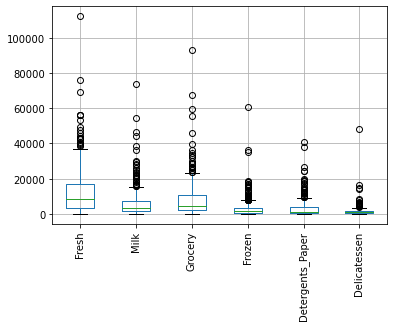

In [30]:
df1.drop(['Buyer/Spender','total'],axis=1).boxplot()
plt.xticks(rotation = 90)

## Yes, from the Box plot, we can see that there are outliers in all the catogories

## Recommendations based on the report.

## From the data, We can see that the region for most of the Buyer/Spender is given as 'Other'. The company need to work on specifying the region instead of providing the region as 'Other'. This will help in better studies of the data, drawing inferences and making conclusions based on the study.
## It is highly recommedned that the process of conducting the investigation needs to be improved and made more reliable to conduct statistical tests and drawing better inferences.
## It is necessary that the various variables in the data sets are re-visited and re-tested for better reliability.
## From the co-efficient of variation of the varieties, we can see that all of the varieties are inconsistent. Need to work on the consistancy of the varieties.
## All of the varieties except Delicatessen do not show similar behavior accross the channel. The company need to investigate the behavior of varieties and compare them across the the channels to understand why we do not see similar behavior of varieties across the channels..